In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df.index.freq = 'MS'

In [4]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [5]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

/home/drslax/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/drslax/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [8]:
test_prediction = fitted_model.forecast(36)

<AxesSubplot:xlabel='Month'>

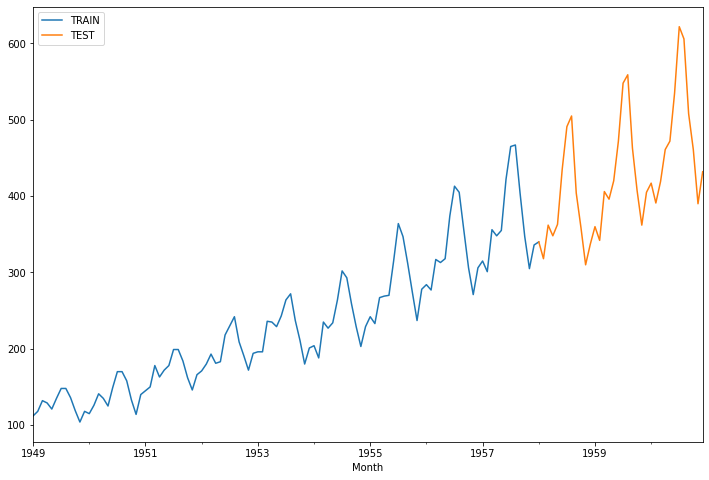

In [9]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

<AxesSubplot:xlabel='Month'>

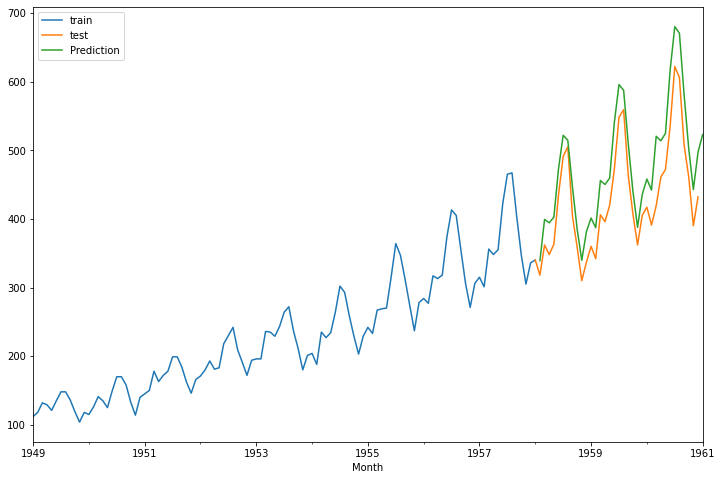

In [12]:
train_data['Thousands of Passengers'].plot(legend=True, label='train', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='test')
test_prediction.plot(legend=True, label='Prediction')

<AxesSubplot:xlabel='Month'>

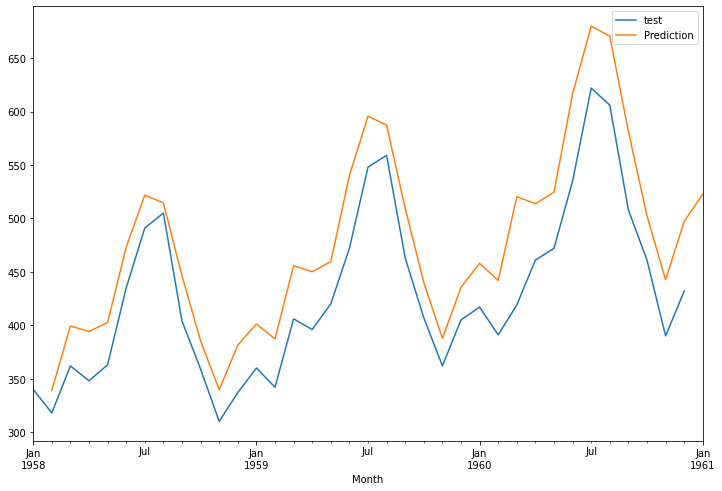

In [16]:
test_data['Thousands of Passengers'].plot(legend=True, label='test', figsize=(12, 8))
test_prediction.plot(legend=True, label='Prediction')

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
mean_absolute_error(test_data, test_prediction)

63.031188493774

In [21]:
np.sqrt(mean_squared_error(test_data, test_prediction))

74.92840108968834

In [20]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',
                                   seasonal='mul', seasonal_periods=12).fit()

/home/drslax/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/drslax/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [27]:
forecast_prediction = final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

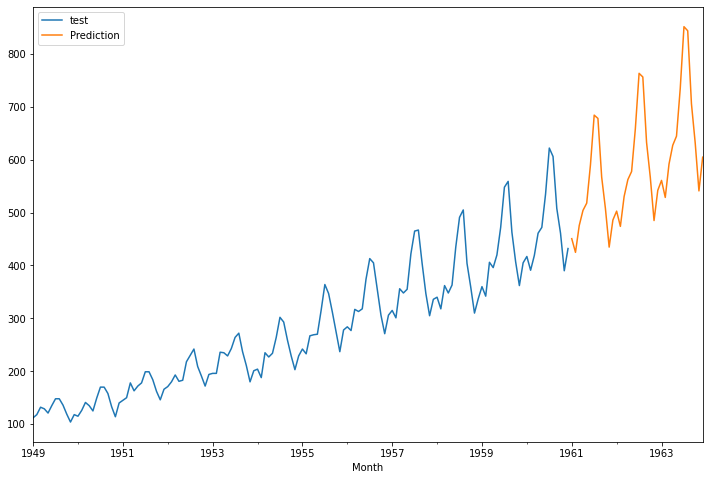

In [28]:
df['Thousands of Passengers'].plot(legend=True, label='test', figsize=(12, 8))
forecast_prediction.plot(legend=True, label='Prediction')